In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
alphabets = ''.join(chr(_) for _ in range(97,123))
alphabets += alphabets.upper() + ',.! '
print(alphabets)
target = 'Hello World!'

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! 


In [15]:
from difflib import SequenceMatcher   # standard package
def similar(a,b):
    return SequenceMatcher(None, a , b).ratio()
print(similar('Hello world','Hey, worlds!'))
print(similar('Hello world','how are you?'))

0.6956521739130435
0.17391304347826086


In [62]:
n = 2000
k = len(target)
population = []
for _ in range(n):
    individual = ''.join([alphabets[i] for i in np.random.randint(0, len(alphabets), size=k)])
    population.append(individual)
print(population[:5])

['nQO bEUDMzED', 'RZQAdFqaNDyC', 'GLunx!EExHPD', 'GsTVnVrEFJMD', 'SD,rJw,tdxjN']


In [39]:
def recombine(a,b):
    cut = np.random.randint(len(a))
    return a[:cut] + b[cut:]  ,  b[:cut] + a[cut:]

def mutate(a, rate=0.01):
    a = list(a)
    for i in range(len(a)):
        if np.random.random() < rate: # mutation
            a[i] = alphabets[ np.random.randint(0, len(alphabets)) ]
    return ''.join(a)

In [87]:
from tqdm import tqdm
def evolve(population, target, n=100, generations=1, mut_rate=0.01):
    avg_fitnesses = []
    for generation in tqdm(range(generations)):
        fitness = np.array([similar(individual, target) for individual in population])
        avg_fitness = np.mean(fitness)
        avg_fitnesses.append(avg_fitness)
        prob = fitness * (1. / (avg_fitness * fitness.size))

        new_population = []
        while len(new_population) < n:
            parents = np.random.choice(population, size=2, p = prob)
            child1, child2 = recombine(parents[0] , parents[1])
            child1 = mutate(child1, mut_rate)
            child2 = mutate(child2, mut_rate)
            new_population.append(child1)
            new_population.append(child2)

        population = new_population

    return population , avg_fitnesses

In [90]:
np.random.seed(0)
new_population, avg_fitnesses = evolve(population,target,n=2000,generations=600,mut_rate=0.00001)

100%|██████████| 600/600 [03:00<00:00,  3.33it/s]


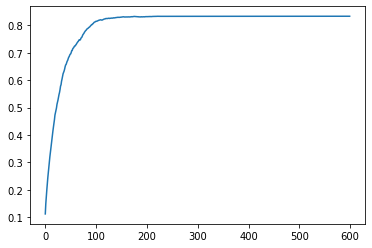

In [101]:
plt.plot(avg_fitnesses)

In [99]:
sorted_new_population = sorted(new_population, key=lambda x: similar(x,target))[::-1]

In [100]:
print(sorted_new_population[:5])
print(f'Max similarity = {similar(target, sorted_new_population[0])}')

['Hell AWoldd!', 'Helo VWold!!', 'Hell VWold!!', 'Hell VWold!!', 'Hell HWoldd!']
Max similarity = 0.8333333333333334
